In [10]:
import scanpy as sc
import numpy as np
#import pandas as pd

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

In [2]:
healthy = sc.read_h5ad("GSE174188/GSE174188_Healthy.h5ad")
healthy

AnnData object with n_obs × n_vars = 486418 × 1999
    obs: 'batch_cov', 'ind_cov', 'Processing_Cohort', 'louvain', 'cg_cov', 'ct_cov', 'L3', 'ind_cov_batch_cov', 'Age', 'Sex', 'pop_cov', 'Status', 'SLE_status', 'cell_type'
    var: 'gene_ids'
    uns: 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [3]:
sample = list(set(healthy.obs.ind_cov))

rows_to_remove = []
for i in sample:
    healthy = healthy[healthy.obs.Status == "Healthy", :]
    if healthy[healthy.obs.ind_cov == i,:].n_obs < healthy.n_obs*0.005:
        rows_to_remove.append(i)
    healthy_filter = healthy[~healthy.obs.ind_cov.isin(rows_to_remove),:]    

sample = list(set(healthy_filter.obs.ind_cov))

personal = {}
for i in sample:
    if i not in personal:
        personal[i] = healthy[healthy.obs.ind_cov == i, :]
        
# 將personal進行排序
sorted_personal = dict(sorted(personal.items(), key=lambda x: x[1].obs.Age[0]))
# 排序之後取得年齡
age = []
for i in sorted_personal:
    age.append(sorted_personal[i].obs.Age[0])

In [4]:
DC = healthy_filter[healthy_filter.obs.cell_type == 'DC',:]
Monocyte = healthy_filter[healthy_filter.obs.cell_type == 'Monocyte',:]
NK = healthy_filter[healthy_filter.obs.cell_type == 'NK',:]
CD8T = healthy_filter[healthy_filter.obs.cell_type == 'CD8 T',:]
CD4T = healthy_filter[healthy_filter.obs.cell_type == 'CD4 T',:]

In [39]:
# 將原始 umap & kmeans的umap畫出來做比較
def umap_compare(cell_type, label):
    # 假設您已經有了一個名為Monocyte的AnnData對象
    fig, axs = plt.subplots(1, 2, figsize=(15, 7))  # 創建一個1行2列的子圖

    # 在左邊的子圖上繪製第一張圖
    sc.pl.umap(cell_type, color="cg_cov", ax = axs[0], show=False)  # 不立即顯示圖形

    # 用 KMeans 在資料中找出 2 個分組
    kmeans = KMeans(n_clusters=2)
    kmeans.fit(cell_type.X)
    cell_type.obs["kmeans"] = kmeans.labels_

    # 在右邊的子圖上繪製第二張圖
    sc.pl.umap(cell_type, color="kmeans", ax = axs[1], show=False)  # 不立即顯示圖形
    plt.savefig(f'Result_picture/GSE174188/K-means proportion trend/umap_compare_{label}.png', dpi=900)
    plt.show()  # 顯示所有圖形

# 進行k_means後proportion的計算
def kmeans_proportion_trend(ID, cell_type_anndata):
    kmeans_1 = []
    kmeans_2 = []
    for i in ID:
        # Get individual cell types from person
        person = cell_type_anndata[cell_type_anndata.obs.ind_cov == i,: ]
        # Get cell types proportion through k-means
        kmeans_1.append(len(person[person.obs.kmeans == 0,:])/len(person.obs.kmeans))
        kmeans_2.append(len(person[person.obs.kmeans == 1,:])/len(person.obs.kmeans))
    return kmeans_1, kmeans_2

# 畫kmeans之後的cell proportion的趨勢
def trend_line(cell_type, label):
    # 創建一個新的圖形
    plt.figure()
    # 繪製NK1的趨勢圖
    plt.plot(cell_type, label=label)
    # 添加圖例
    plt.legend()

    # 計算趨勢線
    z = np.polyfit(range(len(cell_type)), cell_type, 1)
    p = np.poly1d(z)

    # 繪製趨勢線
    plt.plot(p(range(len(cell_type))),'r--', label='Trend Line')
    
    
    plt.savefig(f'Result_picture/GSE174188/K-means proportion trend/trend_{label}.png', dpi=900)
    
    # 顯示圖形
    plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


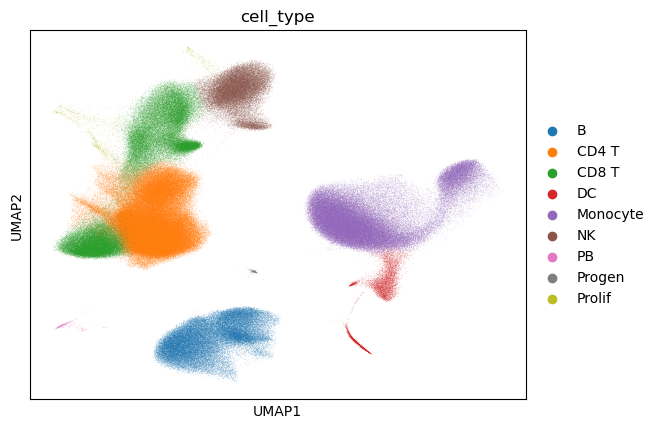

In [41]:
sc.pl.umap(healthy, color="cell_type")

# CD4 T

C:\ProgramData\anaconda3\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


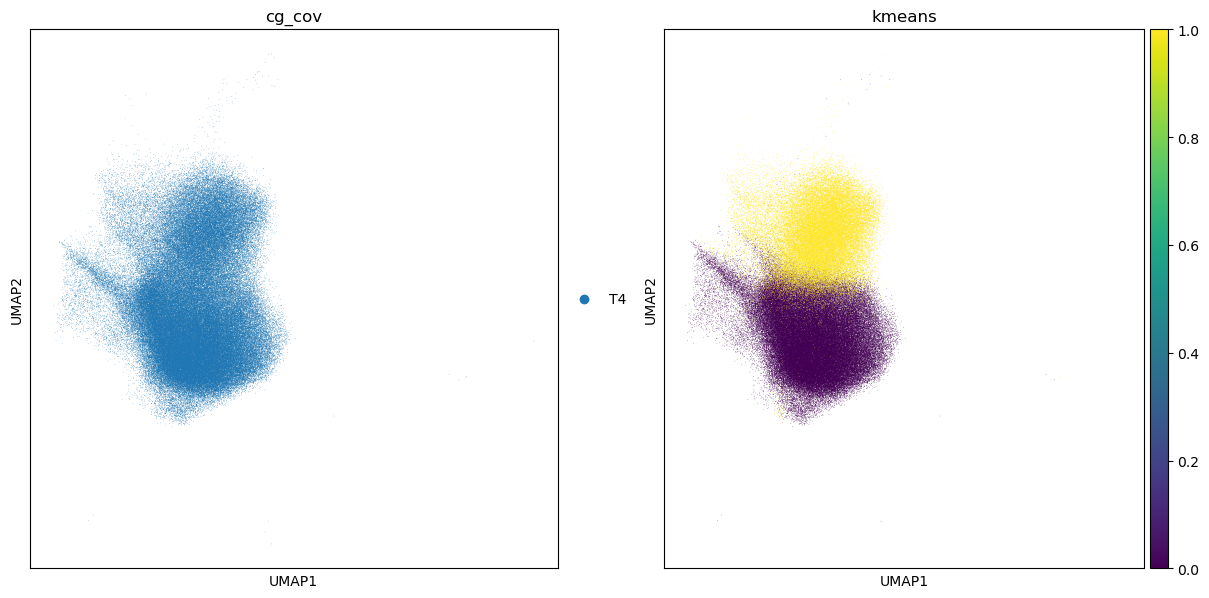

In [42]:
umap_compare(CD4T, "CD4 T")

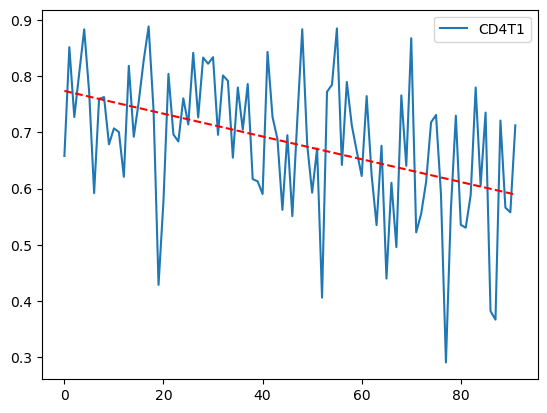

In [43]:
CD4T1, CD4T2 = kmeans_proportion_trend(sorted_personal, CD4T)
trend_line(CD4T1, "CD4T1")

# CD8 T

C:\ProgramData\anaconda3\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


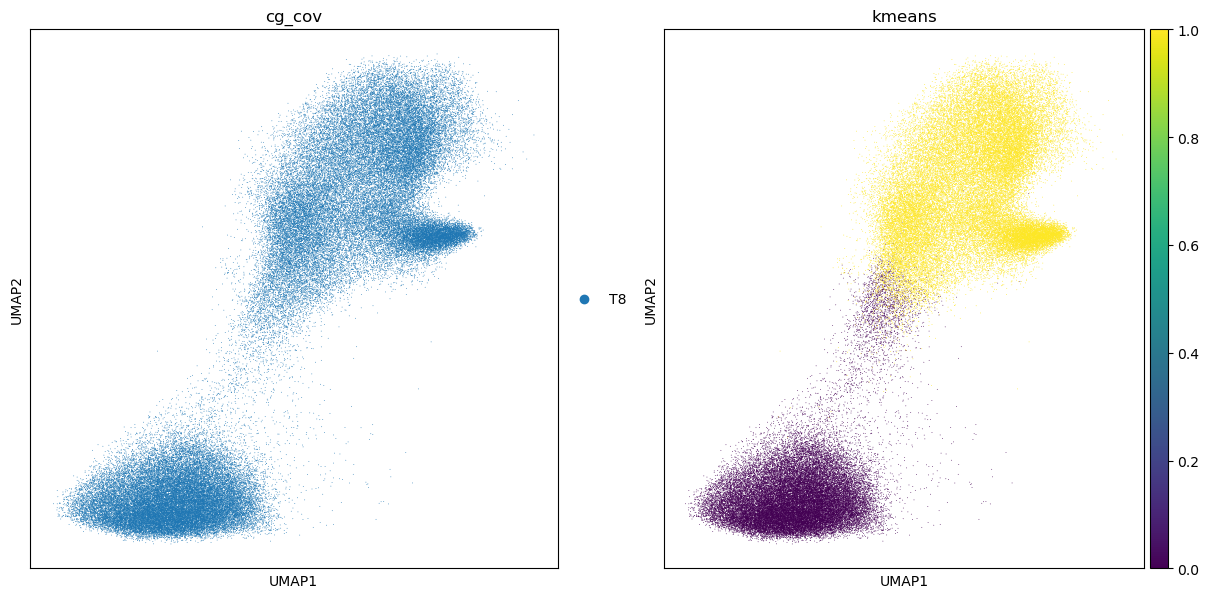

In [44]:
umap_compare(CD8T, "CD8 T")

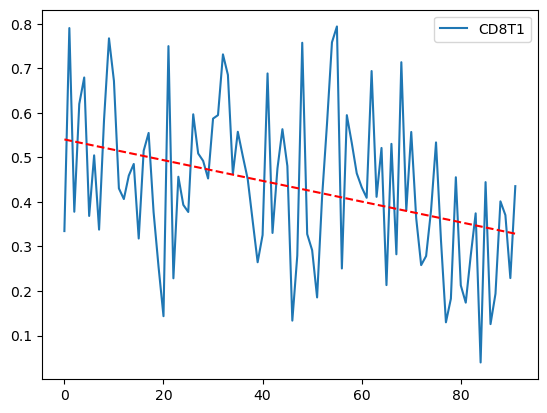

In [45]:
CD8T1, CD8T2 = kmeans_proportion_trend(sorted_personal, CD8T)
trend_line(CD8T1, "CD8T1")

# NK

C:\ProgramData\anaconda3\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


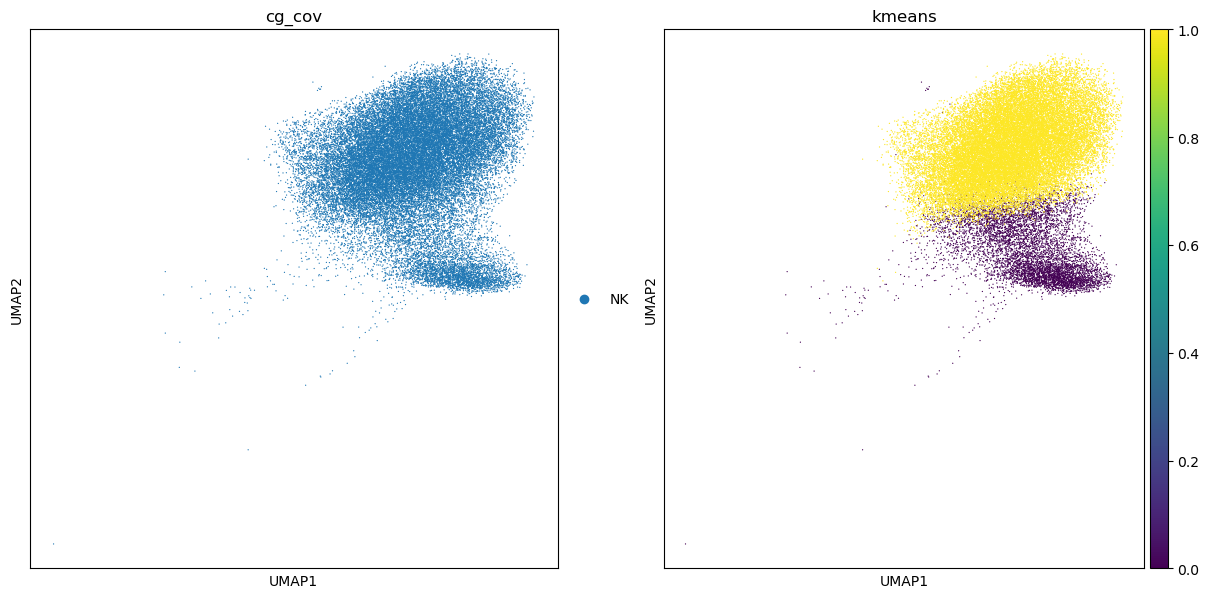

In [46]:
umap_compare(NK, "NK")

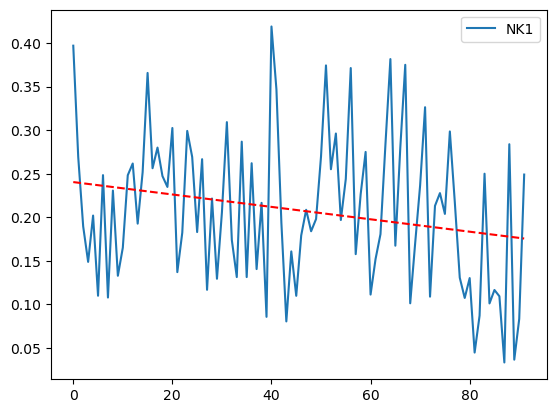

In [47]:
NK1, NK2 = kmeans_proportion_trend(sorted_personal, NK)
trend_line(NK1, "NK1")

# Monocyte

C:\ProgramData\anaconda3\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


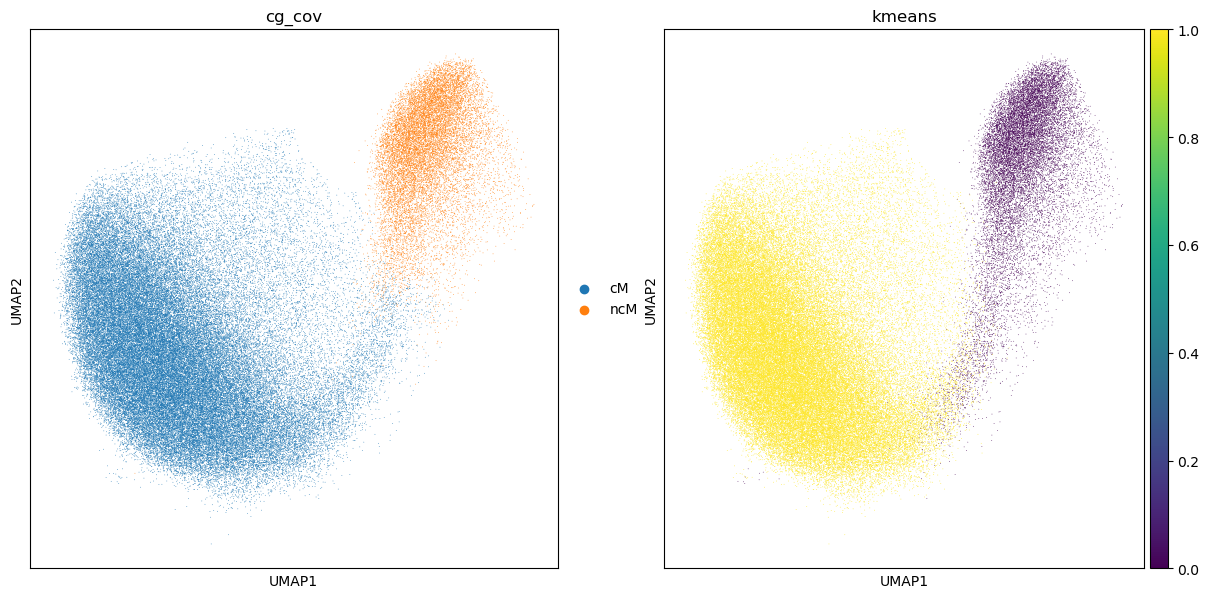

In [48]:
umap_compare(Monocyte,"Monocyte")

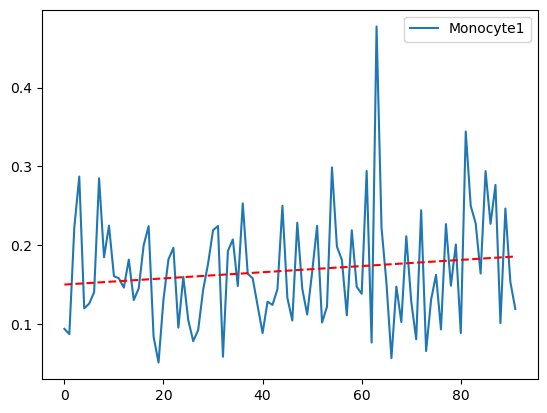

In [49]:
Monocyte1, Monocyte2 = kmeans_proportion_trend(sorted_personal, Monocyte)
trend_line(Monocyte1, "Monocyte1")

# DC

C:\ProgramData\anaconda3\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


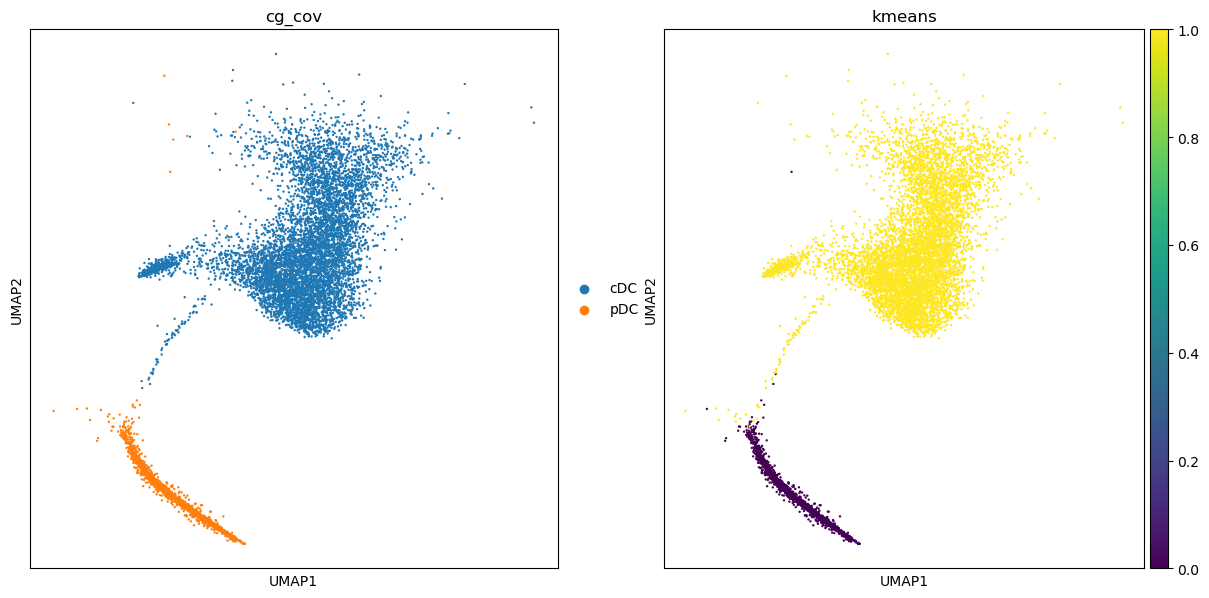

In [50]:
umap_compare(DC, "DC")

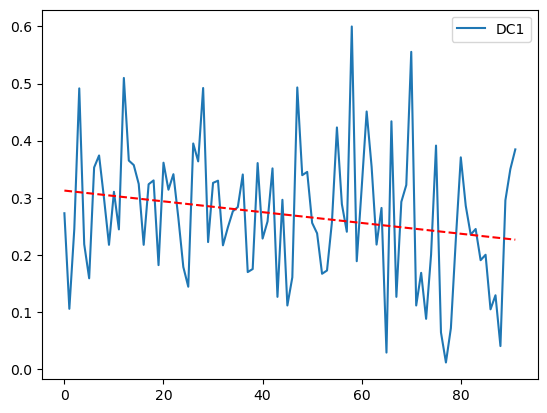

In [51]:
DC1, DC2 = kmeans_proportion_trend(sorted_personal, DC)
trend_line(DC1, "DC1")